<a href="https://colab.research.google.com/github/shahabday/BAMline4CT/blob/main/GPT2_trained_extendedTokenizer_1024_sequence_30_epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch transformers datasets miditok pretty_midi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 19.5 MB/s eta 0:00:00
 

In [2]:
!pip install miditoolkit

In [3]:

import os
from datasets import load_dataset
from datasets import Dataset
import pandas as pd

import miditok
import miditoolkit
from transformers import AutoTokenizer
from transformers import GPT2LMHeadModel
import os
import pandas as pd
import miditok
import miditoolkit
from tqdm import tqdm


# Download Dataset

In [4]:


# Step 1: Create Directory for MIDI Files
os.makedirs("maestro_midi", exist_ok=True)

# Step 2: Download the dataset (ZIP format)
maestro_url = "https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0-midi.zip"
zip_path = "maestro_midi.zip"

print("Downloading Maestro MIDI dataset...")
os.system(f"wget {maestro_url} -O {zip_path}")

# Step 3: Extract only MIDI files
print("Extracting MIDI files...")
os.system("unzip -j maestro_midi.zip '*.midi' -d maestro_midi")

# Step 4: Clean up (Optional)
os.remove(zip_path)

print("Download and extraction complete! MIDI files are in 'maestro_midi' directory.")



Extracting MIDI files...
Download and extraction complete! MIDI files are in 'maestro_midi' directory.


In [5]:

# Step 1: Create Directory for MIDI Files and Metadata
os.makedirs("maestro_dataset", exist_ok=True)

# Step 2: Download Metadata CSV
metadata_url = "https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0.csv"
metadata_path = "maestro_dataset/maestro_metadata.csv"

print("Downloading Maestro metadata...")
os.system(f"wget {metadata_url} -O {metadata_path}")

# Step 3: Load Metadata
metadata_df = pd.read_csv(metadata_path)



In [ ]:
len(midi_files)

1276

In [8]:
metadata_df["midi_filename"][0]

'2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R3_2018_wav--1.midi'

In [6]:
metadata_df["filename"] = metadata_df["midi_filename"].str[5:]

# Tokenizing Midi

In [ ]:
#/content/maestro_midi/MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO_01_R1_2014_wav--3.midi

In [7]:
def get_midi_path(index):
  return os.path.join("/content","maestro_midi",metadata_df["filename"][index])

In [10]:
get_midi_path(1)

'/content/maestro_midi/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MID--AUDIO_03_R2_2008_wav--2.midi'

In [8]:


import miditok
import miditoolkit

# Initialize tokenizer
tokenizer = miditok.REMI()

# Load MIDI file
midi_file = get_midi_path(1)

tokens = tokenizer(midi_file)




In [ ]:
tokenizer.vocab



{'PAD_None': 0,
 'BOS_None': 1,
 'EOS_None': 2,
 'MASK_None': 3,
 'Bar_None': 4,
 'Pitch_21': 5,
 'Pitch_22': 6,
 'Pitch_23': 7,
 'Pitch_24': 8,
 'Pitch_25': 9,
 'Pitch_26': 10,
 'Pitch_27': 11,
 'Pitch_28': 12,
 'Pitch_29': 13,
 'Pitch_30': 14,
 'Pitch_31': 15,
 'Pitch_32': 16,
 'Pitch_33': 17,
 'Pitch_34': 18,
 'Pitch_35': 19,
 'Pitch_36': 20,
 'Pitch_37': 21,
 'Pitch_38': 22,
 'Pitch_39': 23,
 'Pitch_40': 24,
 'Pitch_41': 25,
 'Pitch_42': 26,
 'Pitch_43': 27,
 'Pitch_44': 28,
 'Pitch_45': 29,
 'Pitch_46': 30,
 'Pitch_47': 31,
 'Pitch_48': 32,
 'Pitch_49': 33,
 'Pitch_50': 34,
 'Pitch_51': 35,
 'Pitch_52': 36,
 'Pitch_53': 37,
 'Pitch_54': 38,
 'Pitch_55': 39,
 'Pitch_56': 40,
 'Pitch_57': 41,
 'Pitch_58': 42,
 'Pitch_59': 43,
 'Pitch_60': 44,
 'Pitch_61': 45,
 'Pitch_62': 46,
 'Pitch_63': 47,
 'Pitch_64': 48,
 'Pitch_65': 49,
 'Pitch_66': 50,
 'Pitch_67': 51,
 'Pitch_68': 52,
 'Pitch_69': 53,
 'Pitch_70': 54,
 'Pitch_71': 55,
 'Pitch_72': 56,
 'Pitch_73': 57,
 'Pitch_74': 58,
 'Pitc

In [ ]:
tokens[0].tokens

['Bar_None',
 'Position_16',
 'Pitch_67',
 'Velocity_51',
 'Duration_1.6.8',
 'Position_27',
 'Pitch_72',
 'Velocity_59',
 'Duration_0.7.8',
 'Bar_None',
 'Position_1',
 'Pitch_78',
 'Velocity_71',
 'Duration_3.2.8',
 'Pitch_61',
 'Velocity_43',
 'Duration_3.4.8',
 'Pitch_67',
 'Velocity_55',
 'Duration_3.4.8',
 'Position_2',
 'Pitch_71',
 'Velocity_55',
 'Duration_3.0.8',
 'Position_24',
 'Pitch_79',
 'Velocity_59',
 'Duration_0.6.8',
 'Bar_None',
 'Position_0',
 'Pitch_79',
 'Velocity_75',
 'Duration_1.1.8',
 'Pitch_67',
 'Velocity_59',
 'Duration_1.1.8',
 'Pitch_70',
 'Velocity_59',
 'Duration_1.5.8',
 'Pitch_60',
 'Velocity_43',
 'Duration_1.4.8',
 'Position_6',
 'Pitch_75',
 'Velocity_75',
 'Duration_0.4.8',
 'Position_12',
 'Pitch_59',
 'Velocity_55',
 'Duration_0.6.8',
 'Pitch_75',
 'Velocity_83',
 'Duration_1.0.8',
 'Pitch_69',
 'Velocity_59',
 'Duration_1.0.8',
 'Pitch_67',
 'Velocity_59',
 'Duration_1.0.8',
 'Position_18',
 'Pitch_71',
 'Velocity_71',
 'Duration_1.0.8',
 'Pos

In [9]:


# Initialize tokenizer
tokenizer = miditok.REMI()


def tokenize_midi_files(midi_files, tokenizer):
    tokenized_data = []
    for midi in midi_files:

        tokens = tokenizer(midi)
        tokenized_seq = " ".join(map(str, tokens[0].ids))  # Convert to text-like format
        tokenized_data.append({"text": tokenized_seq})
    return Dataset.from_list(tokenized_data)

# List of MIDI files (update with your dataset)
midi_files = [get_midi_path(1)]


# Convert MIDI to text sequences
dataset = tokenize_midi_files(midi_files, tokenizer)

# Check the processed data
print(dataset[0])


{'text': '4 205 51 105 138 216 56 107 131 4 190 62 110 150 45 103 152 51 106 152 191 55 106 148 213 63 107 130 4 189 63 111 133 51 107 133 54 107 137 44 103 136 195 59 111 128 201 43 106 130 59 113 132 53 107 132 51 107 132 207 55 110 132 215 58 110 148 42 106 164 48 105 142 52 107 125 216 52 97 135 4 194 51 103 126 198 51 104 134 206 57 105 127 215 57 104 151 51 105 137 216 26 101 140 4 197 50 101 126 205 46 102 156 50 103 155 19 102 139 218 26 100 130 4 191 31 99 138 202 58 106 135 210 54 110 134 46 107 132 217 50 111 126 220 44 109 131 4 193 61 112 137 53 108 140 45 107 153 49 109 140 204 60 108 126 208 60 111 137 215 50 108 128 54 109 130 217 46 107 125 4 189 55 111 132 51 110 133 46 108 135 194 61 112 128 197 60 112 128 200 47 111 136 59 114 132 54 112 127 50 111 130 206 54 115 126 211 65 116 136 59 112 137 58 112 131 43 110 131 217 38 111 133 220 57 110 125 4 191 49 113 128 57 112 132 198 66 117 132 205 62 116 130 50 112 130 54 112 130 210 58 115 130 213 55 112 125 51 111 125 215

the tokenizer seems to work . now we have to load the model and extend the tokenizer in the model with our tokens

 Recap: Where We Are
✅ Downloaded MIDI dataset (a folder of .mid files).
✅ Used miditok to tokenize MIDI files into sequences.
✅ Decided between two training approaches:
Approach A: Convert MIDI tokens into a text format (e.g., velocity pitch bar <EOS>) and train GPT-2 using the extended GPT-2 tokenizer.
Approach B: Train GPT-2 directly on integer token sequences without using GPT-2’s built-in tokenizer, using miditok as the tokenizer instead.


I decide to go with the first approach :

1. convert all dataset to text:
for midifile in midifiles :
return miditok_text (midifile)
2. extend GPT2 tokenizer,
3. train on converted midi files to text



In [10]:
# Get special tokens from MIDI tokenizer
midi_vocab = tokenizer.vocab  # Extract MIDI vocabulary from miditok
print("MIDI Vocabulary Size:", len(midi_vocab))



MIDI Vocabulary Size: 282


In [11]:
from transformers import AutoTokenizer

# Load pre-trained GPT-2 tokenizer
gpt_tokenizer = AutoTokenizer.from_pretrained("gpt2")

# Print original vocab size
print("Original GPT-2 Vocabulary Size:", len(gpt_tokenizer))

# Add a padding token
gpt_tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Add MIDI tokens to the tokenizer's vocabulary
gpt_tokenizer.add_tokens(list(midi_vocab.keys()))

print("Final Vocabulary Size:", len(gpt_tokenizer))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Original GPT-2 Vocabulary Size: 50257
Final Vocabulary Size: 50540


In [12]:
from transformers import GPT2LMHeadModel

# Load pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Resize token embeddings to match the new vocabulary size
model.resize_token_embeddings(len(gpt_tokenizer))

print("GPT-2 Model Updated with New MIDI Tokens!")


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


GPT-2 Model Updated with New MIDI Tokens!


## process the data



In [13]:
import os
import miditok
import miditoolkit
from tqdm import tqdm



# Initialize MIDI tokenizer
midi_tokenizer = miditok.REMI()  # Use your preferred tokenization method

def midi_to_text(midi_path, composer="Unknown", piece_type="Unknown"):
    """
    Converts a MIDI file to structured text format for GPT-2 training.

    Args:
        midi_path (str): Path to the MIDI file.
        composer (str): Composer name.
        piece_type (str): Type of the piece (e.g., Sonata, Waltz).

    Returns:
        str: Tokenized text format of the MIDI file.
    """
    try:


        # Tokenize MIDI using miditok
        tokens = tokenizer(midi_path)
        tokenized_seq = tokens[0].tokens  # Get token IDs

        # Convert token IDs to a text-friendly format
        token_text = " ".join(map(str, tokenized_seq))

        # Add metadata headers
        text_output = f"<COMPOSER> {composer} <PIECE_TYPE> {piece_type} <BOS> {token_text} <EOS>"
        return text_output

    except Exception as e:
        print(f"Error processing {midi_path}: {e}")
        return None  # Skip problematic files


In [ ]:
midi_to_text(get_midi_path(0))

'<COMPOSER> Unknown <PIECE_TYPE> Unknown <BOS> Bar_None Position_16 Pitch_67 Velocity_51 Duration_1.5.8 Position_29 Pitch_72 Velocity_67 Duration_0.2.8 Bar_None Position_2 Pitch_78 Velocity_67 Duration_2.7.8 Pitch_71 Velocity_47 Duration_4.2.4 Position_3 Pitch_61 Velocity_39 Duration_2.1.8 Pitch_67 Velocity_39 Duration_2.0.8 Bar_None Position_2 Pitch_79 Velocity_59 Duration_0.5.8 Position_12 Pitch_79 Velocity_71 Duration_0.6.8 Pitch_60 Velocity_47 Duration_1.2.8 Pitch_70 Velocity_63 Duration_1.0.8 Pitch_67 Velocity_55 Duration_1.1.8 Position_19 Pitch_75 Velocity_71 Duration_0.1.8 Position_25 Pitch_75 Velocity_83 Duration_0.6.8 Pitch_69 Velocity_63 Duration_0.5.8 Pitch_59 Velocity_55 Duration_1.5.8 Pitch_67 Velocity_63 Duration_0.7.8 Position_29 Pitch_71 Velocity_71 Duration_0.1.8 Bar_None Position_5 Pitch_74 Velocity_71 Duration_3.7.8 Pitch_64 Velocity_47 Duration_2.5.8 Pitch_68 Velocity_63 Duration_1.2.8 Pitch_58 Velocity_55 Duration_2.1.8 Position_15 Pitch_67 Velocity_47 Duration_0.1

In [ ]:
metadata_df

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration,filename
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160,MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R3_201...
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471,MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MID--AU...
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433,MIDI-Unprocessed_066_PIANO066_MID--AUDIO-split...
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588,MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MID--AU...
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508,MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MID--AU...
...,...,...,...,...,...,...,...,...
1271,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",test,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,241.470442,MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MID--AU...
1272,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",train,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,114.696243,MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MID--AU...
1273,Wolfgang Amadeus Mozart,"Sonata in F Major, K533",validation,2004,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,1139.198478,MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID...
1274,Wolfgang Amadeus Mozart,"Sonata in F Major, K533/K494",validation,2018,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,1068.751602,MIDI-Unprocessed_Recital17-19_MID--AUDIO_17_R1...


In [14]:
import os
import pandas as pd
import miditok
import miditoolkit
from tqdm import tqdm

# Initialize MIDI tokenizer
midi_tokenizer = miditok.REMI()  # Use your preferred MIDI tokenizer


def process_midi_from_metadata(metadata_df, get_midi_path, output_folder):
    """
    Iterates through the metadata DataFrame, converts MIDI files to text, and saves them.

    Args:
        metadata_df (pd.DataFrame): DataFrame containing metadata about MIDI files.
        get_midi_path (function): Function to retrieve the MIDI file path by index.
        output_folder (str): Directory to save processed text files.

    Returns:
        None
    """
    os.makedirs(output_folder, exist_ok=True)

    for index, row in tqdm(metadata_df.iterrows(), total=len(metadata_df)):
        try:
            # Get MIDI file path
            midi_path = get_midi_path(index)

            # Extract metadata
            composer = row.get("canonical_composer", "Unknown")
            piece_type = row.get("canonical_title", "Unknown")

            # Convert MIDI to structured text
            text_data = midi_to_text(midi_path, composer, piece_type)

            if text_data:
                # Save text data as a .txt file
                output_file = os.path.join(output_folder, os.path.basename(midi_path).replace(".midi", ".txt"))
                with open(output_file, "w") as f:
                    f.write(text_data)

        except Exception as e:
            print(f"Error processing row {index}: {e}")

    print("✅ All MIDI files processed and saved as text.")


output_text_folder = "/content/maestro_text"  # Define output directory

# Run the processing script
process_midi_from_metadata(metadata_df, get_midi_path, output_text_folder)


100%|██████████| 1276/1276 [01:35<00:00, 13.34it/s]

✅ All MIDI files processed and saved as text.


In [22]:
## Lets Load the Data

Sofar the MIDI files are converted to text files

GPT2 tokenizer is able to parse these midis and tokenize  them



In [15]:

import os

import glob

def find_txt_files(folder_path):
    txt_files = []
    for filename in glob.glob(os.path.join(folder_path, '*.txt')):
        txt_files.append(filename)
    return txt_files

folder_path = "/content/maestro_text"
txt_files = find_txt_files(folder_path)

In [31]:
assert len(metadata_df) == len(txt_files)


In [32]:
# look at one of the files beginnig :

file_path = txt_files [0]

with open(file_path , 'r') as file :
  for i in range(10):
    line= file.readline()
    if not line : # stopping if file is less than 10 lines
      break
    print(line)


<COMPOSER> Claude Debussy <PIECE_TYPE> "Ondine" from Book II <BOS> Bar_None Position_16 Pitch_61 Velocity_35 Duration_0.4.8 Position_23 Pitch_70 Velocity_43 Duration_0.1.8 Pitch_69 Velocity_35 Duration_0.1.8 Position_24 Pitch_67 Velocity_27 Duration_0.1.8 Position_30 Pitch_73 Velocity_51 Duration_0.5.8 Pitch_77 Velocity_51 Duration_0.4.8 Bar_None Position_8 Pitch_70 Velocity_43 Duration_0.3.8 Position_9 Pitch_69 Velocity_39 Duration_0.2.8 Pitch_67 Velocity_39 Duration_0.2.8 Position_14 Pitch_61 Velocity_43 Duration_0.6.8 Position_25 Pitch_67 Velocity_35 Duration_0.1.8 Pitch_69 Velocity_35 Duration_0.1.8 Pitch_71 Velocity_31 Duration_0.1.8 Bar_None Position_0 Pitch_78 Velocity_51 Duration_0.5.8 Pitch_73 Velocity_51 Duration_0.5.8 Position_13 Pitch_67 Velocity_35 Duration_0.4.8 Pitch_69 Velocity_31 Duration_0.5.8 Pitch_71 Velocity_39 Duration_0.4.8 Position_21 Pitch_61 Velocity_47 Duration_1.1.8 Bar_None Position_16 Pitch_33 Velocity_47 Duration_1.0.8 Position_27 Pitch_59 Velocity_35 Dur

In [16]:

raw_datasets = load_dataset("text", data_files=txt_files)
raw_datasets

Resolving data files:   0%|          | 0/1276 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 1276
    })
})

In [ ]:
## Lets bring the model and start training

In [36]:
# tokenizer is preloaded and extended :
gpt_tokenizer

#model is preloaded and extended with new tokens
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50539, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50539, bias=False)
)

In [44]:
token_sequence = raw_datasets["train"][3]["text"]

print(token_sequence)

indices = gpt_tokenizer(token_sequence)["input_ids"]
print('indices : ')
print(indices)

tokens = [gpt_tokenizer.decode([index]) for index in indices]
print(tokens)
print(len(tokens))

Token indices sequence length is longer than the specified maximum sequence length for this model (11665 > 1024). Running this sequence through the model will result in indexing errors


<COMPOSER> Johann Sebastian Bach <PIECE_TYPE> Prelude and Fugue in A-flat Major, WTC I <BOS> Bar_None Position_17 Pitch_56 Velocity_67 Duration_0.3.8 Pitch_63 Velocity_91 Duration_0.3.8 Pitch_60 Velocity_67 Duration_0.3.8 Position_23 Pitch_68 Velocity_83 Duration_0.2.8 Position_25 Pitch_67 Velocity_91 Duration_0.2.8 Position_27 Pitch_68 Velocity_71 Duration_0.1.8 Bar_None Position_0 Pitch_72 Velocity_71 Duration_0.1.8 Position_4 Pitch_63 Velocity_75 Duration_0.2.8 Position_9 Pitch_68 Velocity_79 Duration_0.1.8 Position_14 Pitch_63 Velocity_95 Duration_0.5.8 Pitch_55 Velocity_79 Duration_0.5.8 Pitch_58 Velocity_75 Duration_0.5.8 Position_19 Pitch_70 Velocity_83 Duration_0.2.8 Position_20 Pitch_68 Velocity_91 Duration_0.2.8 Position_22 Pitch_70 Velocity_87 Duration_0.1.8 Position_27 Pitch_73 Velocity_79 Duration_0.1.8 Position_31 Pitch_63 Velocity_67 Duration_0.1.8 Bar_None Position_3 Pitch_70 Velocity_71 Duration_0.1.8 Position_8 Pitch_72 Velocity_75 Duration_0.1.8 Position_13 Pitch_56 

** The indices sequence length is longer for the model **

we can have two approaches to combat this ,

1. Truncate (by giving a max sequence length of 1024 )
2. chunking with overlap

In [ ]:
# def chunk_long_sequences(examples):
#     tokenized_text = hf_tokenizer(examples["text"])["input_ids"]

#     # Split into overlapping chunks of max 1024 tokens
#     chunk_size = 1024
#     overlap = 256  # 25% overlap for better continuity
#     chunks = [tokenized_text[i : i + chunk_size] for i in range(0, len(tokenized_text), chunk_size - overlap)]

#     return {"input_ids": chunks}

# tokenized_datasets = raw_datasets.map(chunk_long_sequences, batched=False)


100%|██████████| 1276/1276 [03:35<00:00,  5.92it/s]


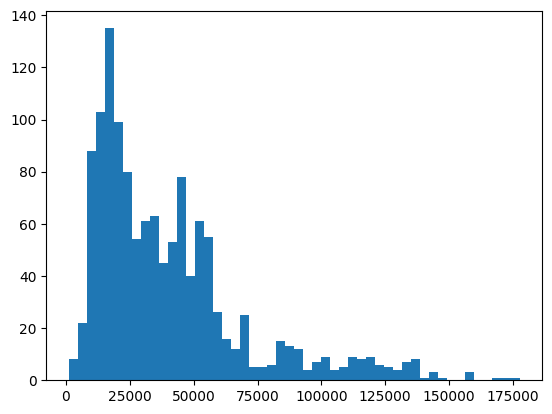

In [39]:
import matplotlib.pylab as plt
import tqdm

lengths = []
for token_sequence in tqdm.tqdm(raw_datasets["train"]):
    token_sequence = token_sequence["text"]
    indices = gpt_tokenizer(token_sequence)["input_ids"]
    lengths += [len(indices)]

plt.hist(lengths, bins=50)
plt.show()

# Train the model

In [17]:
# tokenizing function

sequence_length = 1024

def tokenize_function(example):
    tokenized_example = gpt_tokenizer(
        example["text"],
        truncation=True,
        padding=True,
        max_length=sequence_length,
    )
    return {
        "input_ids": tokenized_example["input_ids"]
    }

# Check a sample.
token_sequence = raw_datasets["train"][0]
print(token_sequence)
tokenized = tokenize_function(token_sequence)
assert list(tokenized.keys()) == ["input_ids"], list(tokenized.keys())
print(tokenized)

{'text': '<COMPOSER> Robert Schumann <PIECE_TYPE> ABEGG Variations, Op. 1 <BOS> Bar_None Position_16 Pitch_81 Velocity_67 Duration_1.4.8 Pitch_69 Velocity_39 Duration_0.3.8 Position_24 Pitch_48 Velocity_39 Duration_0.2.8 Position_26 Pitch_82 Velocity_67 Duration_1.0.8 Pitch_70 Velocity_55 Duration_0.1.8 Position_31 Pitch_64 Velocity_51 Duration_0.1.8 Pitch_58 Velocity_51 Duration_0.1.8 Pitch_60 Velocity_43 Duration_0.1.8 Bar_None Position_2 Pitch_58 Velocity_59 Duration_0.1.8 Pitch_60 Velocity_55 Duration_0.1.8 Pitch_64 Velocity_55 Duration_0.1.8 Pitch_88 Velocity_83 Duration_0.7.8 Pitch_76 Velocity_71 Duration_0.1.8 Position_5 Pitch_60 Velocity_55 Duration_0.1.8 Pitch_58 Velocity_51 Duration_0.1.8 Pitch_64 Velocity_47 Duration_0.1.8 Position_8 Pitch_58 Velocity_59 Duration_0.1.8 Pitch_60 Velocity_43 Duration_0.1.8 Pitch_91 Velocity_91 Duration_0.6.8 Pitch_64 Velocity_55 Duration_0.1.8 Pitch_79 Velocity_75 Duration_0.4.8 Position_11 Pitch_58 Velocity_59 Duration_0.1.8 Pitch_64 Velocity

In [18]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True, remove_columns=raw_datasets["train"].column_names)

# Check a sample.
tokenized = tokenized_datasets["train"][0]
assert list(tokenized.keys()) == ["input_ids"], list(tokenized.keys())
print(tokenized)

Map:   0%|          | 0/1276 [00:00<?, ? examples/s]

{'input_ids': [27, 9858, 37997, 1137, 29, 5199, 3059, 40062, 1279, 11901, 2943, 36, 62, 25216, 29, 9564, 7156, 38, 15965, 602, 11, 8670, 13, 352, 1279, 33, 2640, 29, 220, 50262, 220, 50463, 220, 50323, 220, 50367, 220, 50394, 220, 50311, 220, 50360, 220, 50385, 220, 50471, 220, 50290, 220, 50360, 220, 50384, 220, 50473, 220, 50324, 220, 50367, 220, 50390, 220, 50312, 220, 50364, 220, 50383, 220, 50478, 220, 50306, 220, 50363, 220, 50383, 220, 50300, 220, 50363, 220, 50383, 220, 50302, 220, 50361, 220, 50383, 220, 50262, 220, 50449, 220, 50300, 220, 50365, 220, 50383, 220, 50302, 220, 50364, 220, 50383, 220, 50306, 220, 50364, 220, 50383, 220, 50330, 220, 50371, 220, 50389, 220, 50318, 220, 50368, 220, 50383, 220, 50452, 220, 50302, 220, 50364, 220, 50383, 220, 50300, 220, 50363, 220, 50383, 220, 50306, 220, 50362, 220, 50383, 220, 50455, 220, 50300, 220, 50365, 220, 50383, 220, 50302, 220, 50361, 220, 50383, 220, 50333, 220, 50373, 220, 50388, 220, 50306, 220, 50364, 220, 50383, 220, 5

In [19]:
from transformers import DataCollatorForLanguageModeling
import torch

In [20]:
#initiate a data collector

data_collator = DataCollatorForLanguageModeling(gpt_tokenizer, mlm=False)



In [ ]:
# Test data collector and mode

input_ids: tensor([[   27,  9858, 37997,  1137,    29,  7212,  9075, 32656,  1279, 11901,
          2943,    36,    62, 25216,    29,  6295,  1045,   287,   376,  8386,
            11, 17073,    13, 49090,    25,  1954,  1279,    33,  2640,    29,
           220, 50262,   220, 50463,   220, 50314,   220, 50367,   220, 50387,
           220, 50468,   220, 50311,   220, 50365,   220, 50383,   220, 50469,
           220, 50307,   220, 50367,   220, 50383,   220, 50470,   220, 50295,
           220, 50361,   220, 50383,   220, 50299,   220, 50362,   220, 50383,
           220, 50476,   220, 50311,   220, 50368,   220, 50387,   220, 50262,
           220, 50449,   220, 50307,   220, 50365,   220, 50383,   220, 50451,
           220, 50306,   220, 50367,   220, 50383,   220, 50290,   220, 50364,
           220, 50383,   220, 50300,   220, 50363,   220, 50383,   220, 50458,
           220, 50309,   220, 50366,   220, 50387,   220, 50463,   220, 50306,
           220, 50364,   220, 50383,   22

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


logits: tensor([[[ -31.7897,  -30.7168,  -32.1723,  ...,  -37.7648,  -37.7648,
           -37.7648],
         [ -79.9904,  -78.5193,  -82.4451,  ...,  -89.0597,  -89.0597,
           -89.0597],
         [ -68.7425,  -69.5335,  -71.4340,  ...,  -80.0685,  -80.0685,
           -80.0685],
         ...,
         [   7.2668,    6.2057,    5.0321,  ...,    0.4878,    0.4878,
             0.4878],
         [-148.4430, -153.2144, -153.1340,  ..., -157.1273, -157.1273,
          -157.1273],
         [   7.5779,    6.5261,    5.3375,  ...,    0.7953,    0.7953,
             0.7953]]], grad_fn=<UnsafeViewBackward0>)


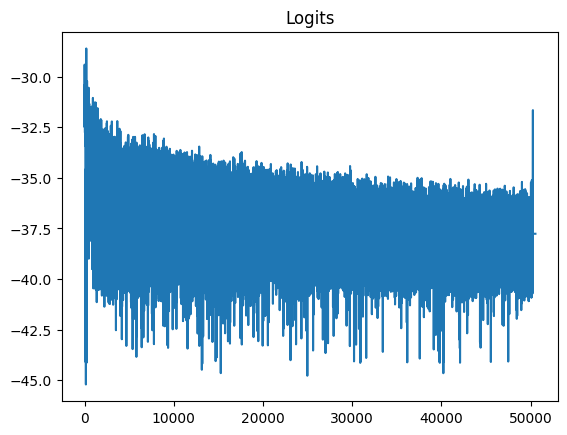

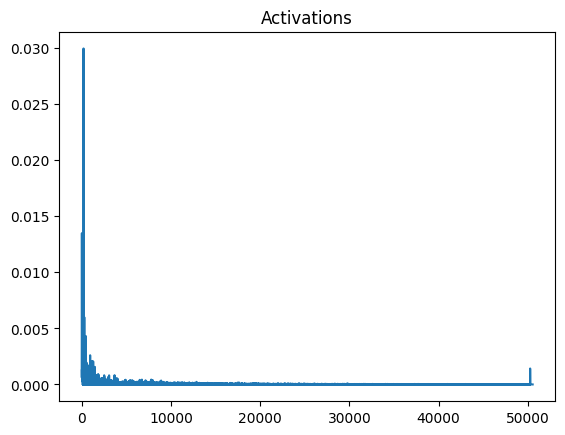

In [52]:

inputs = [tokenized_datasets["train"][2]]
inputs = data_collator(inputs)
assert list(inputs.keys()) == ["input_ids", "attention_mask", "labels"], list(inputs.keys())
print("input_ids:", inputs["input_ids"])
print("")

outputs = model(**inputs)
assert list(outputs.keys()) == ["loss", "logits", "past_key_values"], list(outputs.keys())
print("logits:", outputs["logits"])

plt.plot(outputs["logits"].detach().numpy()[0][0])
plt.title("Logits")
plt.show()
plt.close()

activations = torch.nn.functional.softmax(outputs["logits"], dim=-1)
plt.plot(activations.detach().numpy()[0][0])
plt.title("Activations")
plt.show()
plt.close()

In [21]:
from transformers import GPT2Config, GPT2LMHeadModel
from transformers import TrainingArguments, Trainer


In [70]:
# Get the output directory with timestamp.
output_path = "output"

# Create the trainer.
print("Creating trainer...")
training_args = TrainingArguments(
    output_dir=output_path,
    overwrite_output_dir=True,
    num_train_epochs=30,
    per_device_train_batch_size=72,
    prediction_loss_only=False,
    #report_to="none"
)
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_datasets["train"],
)

# Train the model.
trainer.train()

# Save the tokenizer.
tokenizer.save_pretrained(output_path)

# Save the model.
model.save_pretrained(output_path)

Creating trainer...


Step,Training Loss
500,2.044500


In [24]:
import matplotlib.pyplot as plt


input_ids: tensor([[   27,  9858, 37997,  1137,    29, 44476,  5719,  1355,  2788, 16206,
          1279, 11901,  2943,    36,    62, 25216,    29,  6295,  1045,  1400,
            13,  2608,   287,   513,    12, 38568,  8386,    11,  8670,    13,
          9773,    64,   357,    17,   358,  1222,   513,  4372, 10028,   902,
             8,  1279,    33,  2640,    29,   220, 50262,   220, 50463,   220,
         50290,   220, 50357,   220, 50435,   220, 50309,   220, 50362,   220,
         50401,   220, 50305,   220, 50358,   220, 50435,   220, 50262,   220,
         50449,   220, 50308,   220, 50362,   220, 50390,   220, 50454,   220,
         50311,   220, 50362,   220, 50425,   220, 50296,   220, 50361,   220,
         50404,   220, 50473,   220, 50299,   220, 50356,   220, 50408,   220,
         50262,   220, 50463,   220, 50296,   220, 50356,   220, 50394,   220,
         50262,   220, 50453,   220, 50290,   220, 50358,   220, 50436,   220,
         50309,   220, 50362,   220, 5040

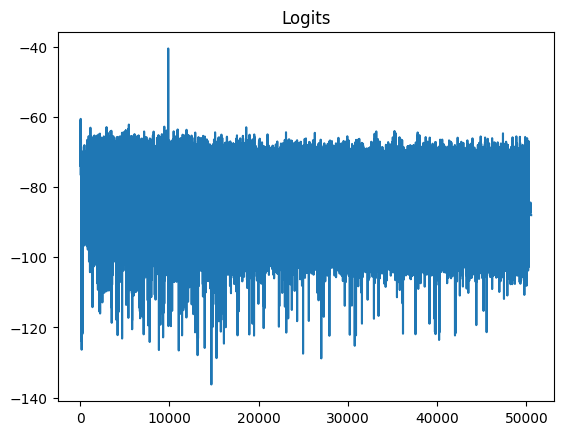

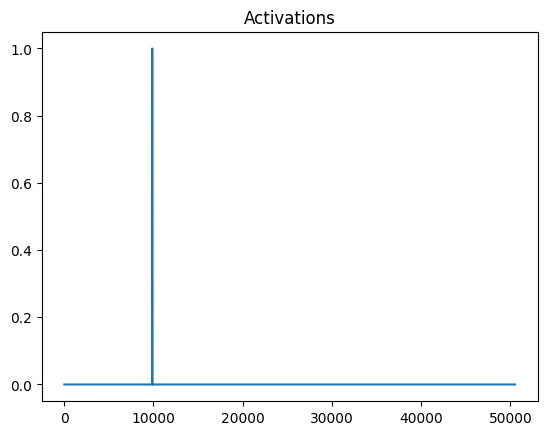

In [71]:
inputs = [tokenized_datasets["train"][2]]
inputs = data_collator(inputs)
assert list(inputs.keys()) == ["input_ids", "attention_mask", "labels"], list(inputs.keys())
print("input_ids:", inputs["input_ids"])
print("")

outputs = model(**inputs.to("cuda:0"))
assert list(outputs.keys()) == ["loss", "logits", "past_key_values"], list(outputs.keys())
print("logits:", outputs["logits"])

plt.plot(outputs["logits"].cpu().detach().numpy()[0][0])
plt.title("Logits")
plt.show()
plt.close()

activations = torch.nn.functional.softmax(outputs["logits"], dim=-1)
plt.plot(activations.cpu().detach().numpy()[0][0])
plt.title("Activations")
plt.show()
plt.close()



In [79]:
model.to("cuda")

# Encode the conditioning tokens.
input_ids = gpt_tokenizer.encode("<COMPOSER> Beehtoven <PIECE_TYPE> sonata in C Major <BOS> ", return_tensors="pt").cuda()
print(input_ids)

# Generate more tokens.
generated_ids = model.generate(
    input_ids,
    max_length=1024,
    do_sample=True,
    temperature=1
)
generated_sequence = gpt_tokenizer.decode(generated_ids[0], clean_up_tokenization_spaces=True)
print(generated_sequence)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[   27,  9858, 37997,  1137,    29,  1355, 17231,  1462,   574,  1279,
         11901,  2943,    36,    62, 25216,    29,  3367,  1045,   287,   327,
          8386,  1279,    33,  2640,    29,   220]], device='cuda:0')
<COMPOSER> Beehtoven <PIECE_TYPE> sonata in C Major <BOS> Bar_None Position_16 Duration_0.1.8 Velocity_83 Pitch_55 Pitch_57 Pitch_65 Position_17 Duration_0.1.8 Pitch_48 Duration_0.1.8 Velocity_27 Duration_0.1.8 Pitch_55 Pitch_74 Pitch_61 Duration_0.1.8 Velocity_27 Position_25 Velocity_51 Bar_None Velocity_67 Pitch_58 Velocity_87 Velocity_71 Velocity_67 Pitch_67 Velocity_39 Velocity_79 Duration_0.4.8 Velocity_47 Velocity_47 Position_26 Bar_None Position_24 Position_31 Velocity_55 Pitch_65 Pitch_64 Duration_0.1.8 Velocity_63 Duration_0.1.8 Velocity_31 Duration_0.3.8 Velocity_47 Velocity_35 Pitch_75 Duration_0.1.8 Velocity_71 Position_4 Pitch_75 Duration_0.7.8 Position_31 Velocity_67 Pitch_67 Velocity_51 Position_3 Velocity_39 Duration_0.1.8 Velocity_47 Pitch_70 Ve

In [73]:

def generate_text_midi(text):
    """
    Finds "<BOS>" in a string and deletes everything before it.

    Args:
        text (str): The input string.

    Returns:
        str: The processed string with content before "<BOS>" removed.
             Returns the original string if "<BOS>" is not found.
    """
    bos_index = text.find("<BOS>")
    if bos_index != -1:
        return text[bos_index+5:]
    else:
        return text

# Example usage (assuming 'token_sequence' is defined as in your code):
# token_sequence = raw_datasets["train"][3]["text"]  # Access the text data
# processed_sequence = process_text(token_sequence)
# print(processed_sequence)


In [80]:
generated_midi= generate_text_midi(generated_sequence)

In [63]:
import miditok
import miditoolkit
import symusic


In [81]:
token_list = generated_midi.split()  # Convert string to list of tokens
tok_sequence = miditok.TokSequence(tokens=token_list)  # Create TokSequence


In [82]:
import os

# Ensure the directory exists before saving the MIDI file
output_midi_path = "content/generated_midi/sonat2_30epochs.midi"
output_dir = os.path.dirname(output_midi_path)

# Create the directory if it does not exist
os.makedirs(output_dir, exist_ok=True)


midi_obj.dump_midi(output_midi_path)

In [67]:

import pretty_midi
import IPython.display as ipd

# Function to convert and play MIDI as audio
def play_midi(midi_path):
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    audio_data = midi_data.synthesize(fs=44100)  # Convert to audio waveform
    return ipd.Audio(audio_data, rate=44100)

In [83]:
play_midi(output_midi_path)
